<a href="https://colab.research.google.com/github/ravi-0309/Optimisation-Techniques/blob/main/Particle_Swarm_Optimization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

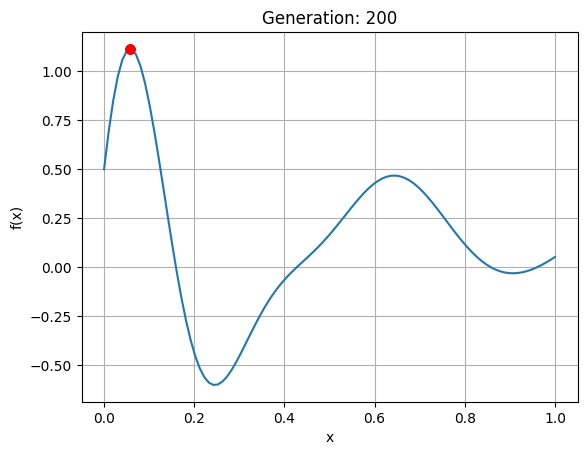

In [43]:
# UNIVARIABLE MAXIMIZATION PROBLEM

import math
import numpy as np
import random
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from IPython.display import HTML

# Objective Function
def objective(x):
  return np.exp(-5 * x) * np.sin(20 * x) + 0.5 * np.cos(10 * x) * np.exp(-x**2) + 0.2 * x

def random_population_generator(population_size, upper_bound, lower_bound):
  return np.random.uniform(lower_bound, upper_bound, population_size)

# Parameters
upper_bound = 1
lower_bound = 0
population_size = 50
iterations = 200

c1_start = 2.5 # Cognitive Learning Factor
c1_end = 0.5
c2_start = 0.5 # Social Learning Factor
c2_end = 2.0
w_max = 0.9
w_min = 0.4

v_max = 0.15 * (upper_bound - lower_bound)
v_min = -v_max

position = random_population_generator(population_size, upper_bound, lower_bound)
velocity = random_population_generator(population_size, upper_bound, lower_bound)
initial_fitness = objective(position)
local_best_position = position.copy()
global_best_position = local_best_position[np.argmax(initial_fitness)]

positions = np.zeros((iterations+1, population_size))
positions[0] = position

for i in range(iterations):
  w = w_max - (i / iterations) * (w_max - w_min)  # Inertia decay
  for j in range(population_size):
    r1 = random.random()
    r2 = random.random()
    c_1 = c1_start - (i / iterations) * (c1_start - c1_end)
    c_2 = c2_start - (i / iterations) * (c2_start - c2_end)
    velocity[j] = (
        w * velocity[j]
        + c_1 * r1 * (local_best_position[j] - position[j])
        + c_2 * r2 * (global_best_position - position[j])
    )

    # Velocity clamping
    velocity[j] = np.clip(velocity[j], v_min, v_max)

    # Update position and clip
    position[j] += velocity[j]
    position[j] = np.clip(position[j], lower_bound, upper_bound)

    # Update personal best
    if objective(position[j]) > objective(local_best_position[j]):
        local_best_position[j] = position[j]

  # Update global best
  fitness_values = np.array([objective(p) for p in local_best_position])
  global_best_position = local_best_position[np.argmax(fitness_values)]

  positions[i + 1] = position

# Generating a Figure
fig, ax = plt.subplots()
x = np.linspace(lower_bound, upper_bound, int(100 * (upper_bound - lower_bound)))
plt.plot(x, objective(x))
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Objective Function')
plt.grid(True)
dots, = ax.plot(positions[0], objective(positions[0]), 'ro')

# Function to update the plot
frame = iterations
def update(frame):
  dots.set_data(positions[frame], objective(positions[frame]))
  ax.set_title(f'Generation: {frame + 1}')
  return dots,

# Create animation
ani = FuncAnimation(fig, update, frames=iterations, interval=50, blit=True)

# Display animation
HTML(ani.to_jshtml())